# GlyphGAN
This is an implementation of GlyphGAN.

## Setup

In [1]:
import torch
from models import build_glyph_gan_generator, build_glyph_gan_critic, get_optimizer
from training import train
USE_GPU = True

data_type = torch.FloatTensor

if USE_GPU and torch.cuda.is_available():
    data_type = torch.cuda.FloatTensor

## Main Training Loop

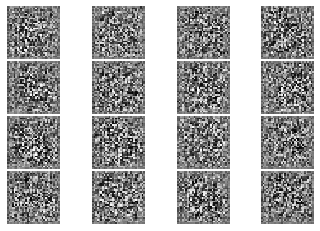


1 --- G: -0.36161279678344727 | D: -0.01114 | GP: 0.4632 | GNorm: 0.905 --- Total time: 15.0319082736969


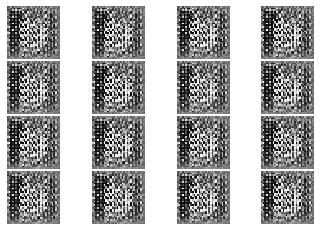


2 --- G: -0.28182709217071533 | D: -0.237 | GP: 0.328 | GNorm: 0.9782 --- Total time: 14.876867294311523


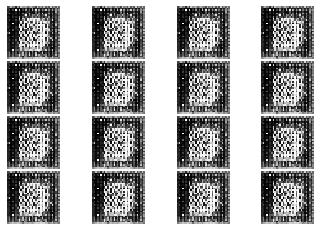


3 --- G: -0.29756903648376465 | D: -0.4945 | GP: 0.1339 | GNorm: 0.9984 --- Total time: 14.709538698196411


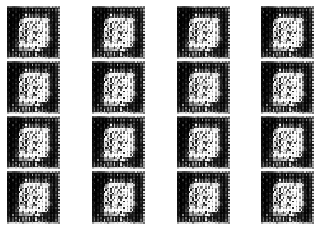


4 --- G: -0.2574222981929779 | D: -0.4799 | GP: 0.1352 | GNorm: 0.9765 --- Total time: 14.650084018707275


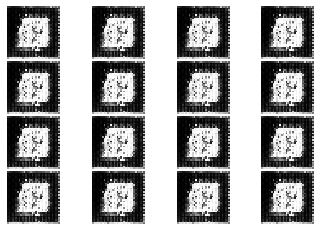


5 --- G: -0.310494601726532 | D: -0.4539 | GP: 0.1691 | GNorm: 1.023 --- Total time: 14.8407301902771


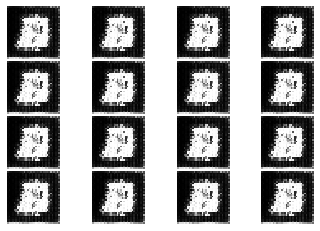


Total training time: #75.45553088188171


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [6]:
image_size = (32, 32, 1)

noise_dimension = 100
dimension = 16
batch_size = 128

G = build_glyph_gan_generator(image_size, noise_dimension=noise_dimension, dimension=dimension)
D = build_glyph_gan_critic(batch_size, image_size, dimension)

if USE_GPU and torch.cuda.is_available():
    G.cuda()
    D.cuda()

D_solver = get_optimizer(D)
G_solver = get_optimizer(G)

train(D, G, D_solver, G_solver,
      batch_size=128,
      epoch_count=5,
      noise_dimension=noise_dimension,
      data_type=data_type,
      generate_gif=True)